In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('salaries.csv')

In [3]:
sal.head(5)

,Function,sup1,sup2,sup3,sup4,sup5,salary,gender,disabled,race,...,inst4,inst5,instBudget,City,State,Zip,country,Category,instSize,instType
0,position1,16,1,0,350,135,125000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
1,position3,7,0,0,320,120,92000,Woman,False,Other,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
2,position3,4,0,0,25,15,88000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
3,position5,0,0,0,5,0,75000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution
4,position18,0,0,0,0,0,67000,Woman,False,Caucasian,...,350,120,3100000,Edmonton,AB,T6G 2H9,CANADA,one,35630,Public Institution


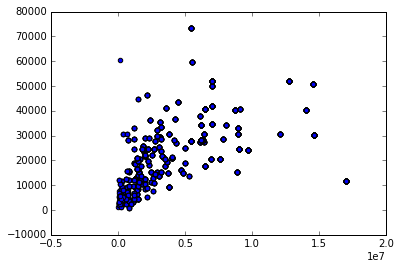

In [4]:
#plt.plot(sal['instBudget'], sal['instSize'])
plt.scatter(sal['instBudget'], sal['instSize'])
plt.show()

In [5]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]

In [6]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
         'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
X_categorical = sal2[X_categorical_features]

In [7]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Function_dummies = pd.get_dummies(X_categorical['Function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
Category_dummies = pd.get_dummies(X_categorical['Category'])
instType_dummies = pd.get_dummies(X_categorical['instType'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [8]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [9]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [10]:
# y is salary
y = sal2.iloc[:, 6].values

In [11]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [13]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print(eigen_vals.shape)


Eigenvalues 
[  4.49991326e+00   3.89290539e+00   2.54054699e+00   2.45367125e+00
   2.09074274e+00   2.02851460e+00   1.86748629e+00   6.93696991e-03
   3.90492953e-03   2.42574050e-02   6.29976123e-02   6.06210362e-02
   1.26772837e-01   1.52213603e+00   7.42330589e-16   1.90581289e-01
   2.10134557e-01   2.49173870e-01   3.17312576e-01   3.27364492e-01
   3.56919286e-01   4.08829723e-01   4.62774154e-01   1.41865291e+00
   5.22188649e-01   5.66255499e-01   6.03012355e-01   6.20243702e-01
   1.32212229e+00   1.32295331e+00   6.75742544e-01   7.30248237e-01
   1.25002172e+00   1.22552222e+00   7.99479975e-01   8.06022729e-01
   8.41015211e-01   8.48273868e-01   1.16995304e+00   1.16551087e+00
   1.14717584e+00   1.13499138e+00   8.99955244e-01   9.07085075e-01
   9.18345855e-01   1.11398347e+00   1.09384407e+00   9.44292714e-01
   9.49639461e-01   9.63688210e-01   9.69940024e-01   1.07793522e+00
   9.90395997e-01   1.05861872e+00   1.00279196e+00   1.05258312e+00
   1.04819790e+00   

In [14]:
np.savetxt('cov.csv', cov_mat, delimiter=',')

In [15]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

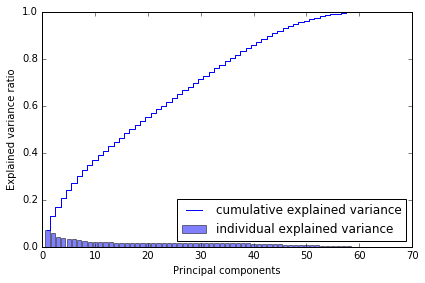

In [16]:
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [17]:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(pca.explained_variance_ratio_)
print(len(pca.explained_variance_ratio_))

[ 0.0702669   0.06078837  0.03967106  0.03831449  0.0326473   0.03167559
  0.02916111  0.02376841]
8


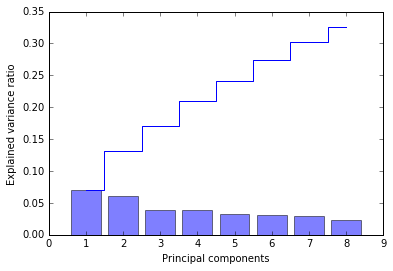

In [18]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [19]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [20]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 49216.2572303
Coefficients: 
 [-6602.82202496  2048.49131506   694.39784746 -2212.46107431   413.37953477
    33.29567929   -54.7554838  -2010.45702029]
Residual sum of squares, training data: 119627432.10
Residual sum of squares, test data: 138438130.22
Variance score, training data: 0.66
Distribution of prediction error on training data:


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


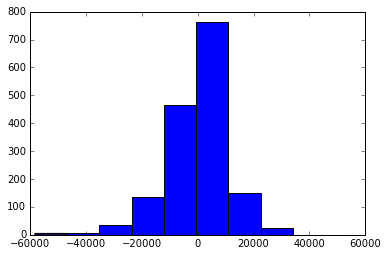

Distribution of prediction error on test data:


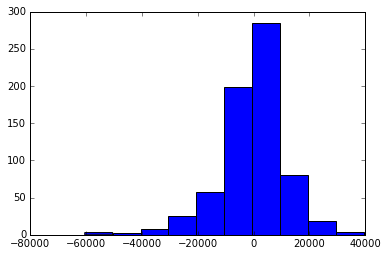

In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train_pca
X_train = X_train_pca.reshape(-1, X_train_pca.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test_pca) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test_pca) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test_pca) - y_test
plt.hist(predError)
plt.show()